<a href="https://colab.research.google.com/github/Naren8520/Python/blob/main/time_series_forecasting_arima_lstm_Random_forest_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

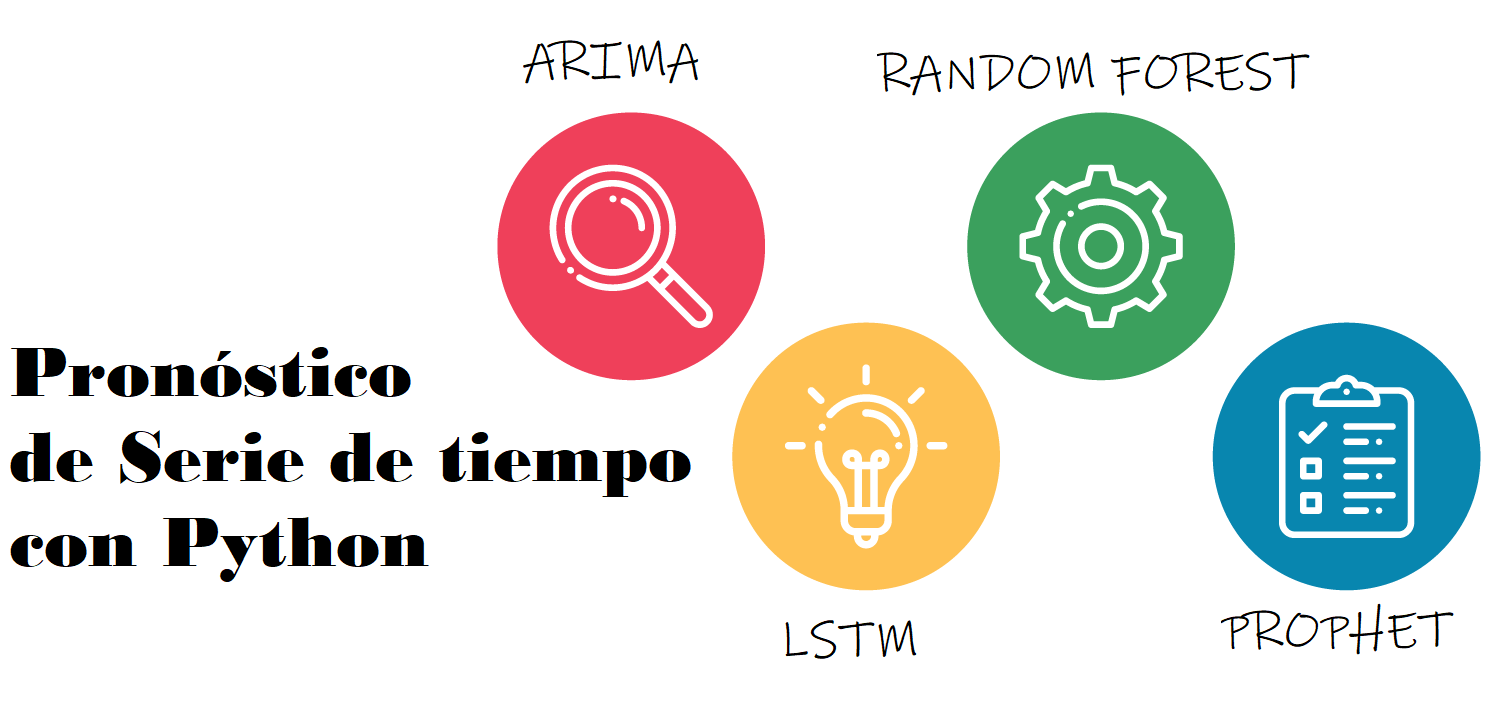

In [ ]:
#@title
from IPython.display import Image
Image("/content/drive/MyDrive/imagenes/utopico.png")

# **Autor:Naren Castellon**

## **Contenido**

1. **Introducción a Serie de tiempo**
        1.1 ¿Qué es una serie de tiempo?
        1.2 Caracteristica de la serie de tiempo
        1.3 Supuesto de la serie de tiempo
        1.4 Tipos de Series de tiempo
            1.4.1 Series de tiempo Univariada
            1.4.2 Series de tiempo Multivariada
2. **Evaluación de Modelos** 
        2.1 Métrica MSE
        2.2 Métrica RMSE
        2.3 Métrica MAE
        2.4 Métrica MAPE
        2.5 Métrica R^2
3. **Modelo Arima**
        3.1 Definición Matemática de Modelo Arima
        3.2 Leemos datos
        3.3 Análisis Exploratorio de Datos (EDA)
        3.4 Prueba de Dickey Fuller Aumentada (ADF)
        3.5 División de datos para entrenamiento y prueba
        3.6 Modelo con Auto-Arima
        3.7 Implementación del modelo
4. **Modelo LSTM**
        4.1 Estandarización de los datos
        4.2 Modelación con LSTM
        4.3 Evaluación del modelo
5. **Modelo Random Forest**
        5.1 Idea intuitiva detrás de los Bosques Aleatorios
        5.2 Feature Change
        5.3 Implementación del Modelo Random Forest
        5.4 Evaluación del modelo
6. **Modelo Prophet**
        6.1 Modelación del modelo Prophet
        6.2 Evaluación del modelo
7. **Conclusión**

## 1.1 **¿Qué es una Serie de Tiempo?**

Una serie de tiempo es una secuencia de datos u observaciones, medidos en determinados momentos y ordenados cronológicamente. Visualmente, es una curva que evoluciona en el tiempo. Una serie de tiempo es un conjunto de observaciones sobre los valores que toma una variable (cuantitativa) a través del tiempo.

**Ejemplo de algunas aplicaciones de datos de serie temporal**

1. Anual: - PIB, serie macroeconómica
2. Trimestral:- Ingresos de una empresa.
3. Mensual: - Ventas, gastos, salario
4. Semanal:- Demanda, Precio de Gasolina y Diesel
5. Diariamente:- Precio de cierre de acciones, valor sensex, transacción diaria de cajero automático
6. Por hora: - AAQI

El análisis de series de tiempo puede ser útil para ver cómo cambia un activo, un valor o una variable económica dados con el tiempo. También se puede utilizar para examinar cómo los cambios asociados con el punto de datos elegido se comparan con los cambios en otras variables durante el mismo período de tiempo.


## 1.2 Características de la serie de tiempo
Una serie temporal es una colección de puntos de datos que se almacenan con respecto a su tiempo. El análisis matemático y estadístico realizado en este tipo de datos para encontrar patrones ocultos e información significativa se denomina análisis de series temporales. Las técnicas de modelado de series temporales se utilizan para comprender patrones pasados ​​a partir de los datos y tratar de pronosticar horizontes futuros. Estas técnicas y metodologías han ido evolucionando durante décadas.

Las observaciones con marcas de tiempo continuas y variables objetivo a veces se enmarcan como problemas de regresión sencillos al descomponer las fechas en minutos, horas, días, semanas, meses, años, etc., que no es la forma correcta de manejar dichos datos porque los resultados obtenidos son deficientes. . En este capítulo, aprenderá el enfoque correcto para manejar datos de series de tiempo.

Hay diferentes tipos de datos, como estructurados, semiestructurados y no estructurados, y cada tipo debe manejarse a su manera para obtener el máximo conocimiento. En este libro, vamos a ver datos de series de tiempo que están estructurados de manera tal como datos del mercado de valores, clima, tasas de natalidad, tráfico, aplicaciones para compartir bicicletas, etc.

## 1.3 Supuesto de la Series de Tiempo 


Algunos de los supuesto más comunes que se hacen para las series de tiempo se basan en el sentido común. Pero siempre debemos de tener en cuenta algunas cosas más

> ¡Los pronósticos a muy largo plazo no funcionan bien!

* El pronóstico se realiza teniendo en cuenta que el mercado y las demás condiciones no van a cambiar en el futuro.
* No habrá ningún cambio en el mercado.
* Pero el cambio es gradual y no un cambio drástico.
* Situaciones como la recesión en el mercado estadounidense de 2008 pondrán nerviosos los pronósticos.
* Eventos como la desmonetización desbaratarían los pronósticos

Con base en los datos disponibles, no deberíamos intentar pronosticar más de unos pocos períodos por delante.

## 1.4 Tipos de Series de Tiempo

### 1.4.1 Series temporales univariadas

Una serie temporal univariada es una serie de datos con una única variable dependiente del tiempo, como la demanda de un producto en el momento t.

> Una serie de tiempo que consta de observaciones individuales (escalares) registradas secuencialmente en incrementos de tiempo iguales. Algunos ejemplos son las concentraciones mensuales de CO2 y las oscilaciones del sur para predecir los efectos de El Niño.

Por ejemplo, eche un vistazo al conjunto de datos de muestra a continuación que consta de las temperaturas mínimas durante los meses del año desde el hemisferio sur desde 1981 hasta 1990. Aquí, la temperatura es la variable dependiente (dependiente del tiempo).

### 1.4.2 Series temporales multivariadas

Los datos de una serie temporal multivariada contienen más de una variable dependiente del tiempo. Cada variable aquí depende no solo de los valores pasados, sino que también tiene cierta dependencia de otras variables. Esta dependencia se utiliza para pronosticar los valores futuros. 

# 2. Evaluación de Modelos

Al desarrollar modelos de aprendizaje automático, generalmente comparamos varios modelos durante la fase de construcción. Luego, estimamos los rendimientos de esos modelos y se seleccionamos el modelo que considera que tiene mayor probabilidades de funcionar bien. Necesitamos medidas objetivas de desempeño para poder decidir qué pronóstico conservar como su pronóstico real. A lo largo de este cuaderno, vamos a usar numerosas herramientas para la evaluación de modelos. Veremos diferentes estrategias para evaluar modelos de aprendizaje automático en general y adaptaciones y consideraciones específicas a tener en cuenta para la previsión. También verá diferentes métricas para calificar el rendimiento del modelo.

## 2.1 Métrica 1: MSE
El error cuadrático medio (MSE) es una de las métricas más utilizadas en el aprendizaje automático. Se calcula como el promedio de los errores al cuadrado. Para calcular el MSE, toma los errores por fila de datos, eleva al cuadrado esos errores y luego toma el promedio de ellos.

$$MSE=\frac{1}{n}\sum(y_i-\hat y_i)^2 $$

La métrica de error MSE es excelente para comparar diferentes modelos en el mismo conjunto de datos. La escala del MSE será la misma para cada modelo aplicado al mismo conjunto de datos. Sin embargo, la escala de la métrica no es muy intuitiva, lo que dificulta su interpretación fuera de la evaluación comparativa de múltiples modelos.

## 2.2 Métrica 2: RMSE
El RMSE, o raíz del error cuadrático medio, es la raíz cuadrada del error cuadrático medio. Como puede comprender, sacar la raíz cuadrada del MSE no hace ninguna diferencia cuando desea utilizar las métricas de error para clasificar los rendimientos en orden.

$$RSME=\sqrt{MSE} $$

Sin embargo, hay una ventaja en usar el RMSE en lugar del MSE. La razón para sacar la raíz cuadrada del MSE es que la escala del RMSE es la misma que la escala de la variable original. En la fórmula MSE, se toma el promedio de los errores al cuadrado. Esto hace que el valor sea difícil de interpretar. El uso de la raíz cuadrada hará que la escala de la métrica de error vuelva a la escala de sus valores reales.

## 2.3 Métrica 3: MAE
El error absoluto medio (MAE) se calcula tomando las diferencias absolutas entre los valores pronosticados y reales por fila. El promedio de esos errores absolutos es el error absoluto medio.

$$MAE=\frac{1}{n} \sum|y_i-\hat y_i| $$

El MAE toma los valores absolutos de los errores antes de promediarlos. Tomar el promedio de los errores absolutos es una forma de asegurarse de que la suma de los errores no haga que se cancelen entre sí.

Has visto que el MSE usa el cuadrado de los errores para evitar esto, y el MAE es una alternativa a esto. El MAE tiene una fórmula más intuitiva: es la métrica de error que la mayoría de la gente encuentra intuitivamente. Sin embargo, el RMSE es generalmente favorecido sobre el MAE.

## 2.4 Métrica 4: MAPE
El MAPE, abreviatura de Error porcentual absoluto medio, se calcula tomando el error de cada predicción, dividido por el valor real. Esto se hace para obtener los errores relativos a los valores reales. Esto hará que la medida del error sea un porcentaje y, por lo tanto, está estandarizado.

Como hemos entendido de las medidas de error anteriores, no se estandarizaron en una escala entre cero y uno. Sin embargo, esta estandarización es muy útil. Esto facilita la comunicación de los resultados de rendimiento.

Para calcular el MAPE, toma los valores absolutos de esos porcentajes por fila y calcula su promedio. 

$$MAPE=\frac{1}{n}\sum|\frac{y_i-\hat y_i}{y_i}| $$

El MAPE mide un porcentaje de error. Es una medida de error, por lo que los valores más bajos para el MAPE son mejores. Sin embargo, puede convertir fácilmente el MAPE en una medida de bondad de ajuste calculando 1 – MAPE. En muchos casos, es más fácil comunicar el desempeño en términos de un resultado positivo que negativo.

## 2.5 Métrica 5: R2
La métrica R2 (R cuadrado) es una métrica que está muy cerca de la métrica 1 - MAPE. Es una métrica de rendimiento en lugar de una métrica de error, lo que la hace ideal para estimar el rendimiento de nuestro modelo.

El R2 es un valor que tiende a estar entre 0 y 1, siendo 0 malo y 1 perfecto. Por lo tanto, se puede usar fácilmente como un porcentaje multiplicándolo por 100. El único caso en el que el R2 puede ser negativo es si su pronóstico es más del 100 % incorrecto.

$$R^2=1-\frac{\sum(y_i -\hat y_i)^2 }{\sum (y_i -\bar y_i )^2} $$

La fórmula hace un cálculo interesante. Calcula una relación entre la suma de los errores al cuadrado y la suma de las desviaciones entre el pronóstico y el promedio. Esto se reduce a un porcentaje de aumento de su modelo sobre el uso del promedio como modelo. Si su modelo es una predicción tan mala como usar el promedio, entonces el R2 será cero. Como el promedio se usa a menudo como modelo de referencia, esta es una métrica de rendimiento muy práctica.

## 2.6 Función para evaluar

In [ ]:
def evaluacion_metrica(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

# 3. Pronóstico de Series de tiempo 

En este cuaderno intentaremos pronosticar una serie de datos de tiempo básicamente. Construiremos cuatro modelos diferentes con Python e inspeccionaremos sus resultados. Los modelos que utilizaremos son ARIMA (media móvil integrada autorregresiva), LSTM (red neuronal de memoria a largo plazo), Random Forest y Facebook Prophet. 

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# Manipulación y tratamiento de Datos
import numpy as np
import pandas as pd

# Visualización de datos
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Modelación Arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import adfuller

# Modelo Auto-Arima
from pmdarima import auto_arima 
import pmdarima as pm

# Métrica de Evaluación
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn import metrics

# No presentar advertencias
import warnings
warnings.filterwarnings("ignore")


In [19]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 3.1 ARIMA (Autoregressive Integrated Moving Average)

ARIMA es un modelo que se utiliza para predecir tendencias futuras en una serie de datos de tiempo. Es un modelo que forma de análisis de regresión. El modelo Arima esta compuesto por 3 término:
* **AR (Autoregresión) :** Modelo que muestra una variable cambiante que retrocede sobre sus propios valores atrasados/anteriores.
* **I (Integrado) :** Diferenciación de observaciones sin procesar para permitir que la serie temporal se vuelva estacionaria
* **MA (Promedio móvil) :** Dependencia entre una observación y un error residual de un modelo de promedio móvil

Para los modelos ARIMA, una notación estándar sería ARIMA con p, d y q, donde los valores enteros sustituyen a los parámetros para indicar el tipo de modelo ARIMA utilizado.

* **p:** el número de observaciones de retraso en el modelo; también conocido como el orden de retardo.
* **d:** el número de veces que se diferencian las observaciones sin procesar; también conocido como el grado de diferenciación.
* **q:** el tamaño de la ventana de promedio móvil; también conocido como el orden de la media móvil.

### Definición del modelo
El modelo ARIMA es la abreviatura del modelo Autoregresivo de Media Móvil Integrada. La diferencia con el modelo ARMA es pequeña: solo hay un efecto adicional que hace que la serie temporal no sea estacionaria. Un ejemplo simple de esto sería una tendencia lineal creciente, como se muestra en la siguiente ecuación:

$$X_t= c+\epsilon_t+ \sum_{i=1}^{p}\phi_i X_{t-i}+\sum_{i=1}^{q} \theta_i \epsilon_{t-i}+\delta_t $$

Al diferenciar una serie temporal, en realidad comienza a modelar las diferencias de un paso a otro en lugar de los valores originales. Si los valores reales de una variable no son estables en el tiempo, aún es posible que las diferencias sean estables en el tiempo.

La tendencia lineal es un gran ejemplo de esto. Imagine una tendencia lineal que comienza desde 0 y se incrementa en 2 cada paso de tiempo. Los valores no serán para nada estacionarios: aumentarán infinitamente. Sin embargo, la diferencia entre cada valor y el siguiente es siempre 2, por lo que la serie temporal diferenciada es perfectamente estacionaria.

|Modelo         |p   d   q |Diferenciado         |Método|
|---------------|----------|---------------------|--------------|
|Arima(0,0,0)   |0   0   0 |$y_t=Y_t$            |Ruido Blanco|
|ARIMA (0,1,0)  |0   1   0 |$y_t = Y_t - Y_{t-1}$| Caminata aleatoria|
|ARIMA (0,2,0)  |0   2   0 |$y_t = Y_t - 2Y_{t-1} + Y_{t-2}$| Constante|
|ARIMA (1,0,0)  |1   0   0 |$\hat Y_t = \mu + \Phi_1 Y_{t-1} + \epsilon $| AR(1): Modelo de regresión de primer orden|
|ARIMA (2, 0, 0)|2   0   0 |$\hat Y_t = \Phi_0 + \Phi_1 Y_{t-1} + \Phi_2 Y_{t-2} + \epsilon$| AR(2): Modelo de regresión de segundo orden|
|ARIMA (1, 1, 0)|1   1   0 |$\hat Y_t = \mu + Y_{t-1} + \Phi_1 (Y_{t-1}- Y_{t-2})$ | Modelo autoregresivo de primer orden diferenciado|
|ARIMA (0, 1, 1)|0   1   1 |$\hat Y_t = Y_{t-1} - \Phi_1 e^{t-1}$| Simple exponential smoothing|
|ARIMA (0, 0, 1)|0   0   1 |$\hat Y_t = \mu_0+ \epsilon_t – \omega_1 \epsilon_{t-1}$| MA(1): Modelo de regresión de primer orden|
ARIMA (0, 0, 2) |0   0   2 |$\hat Y_t = \mu_0+ \epsilon_t – \omega_1 \epsilon_{t-1} – \omega_2 \epsilon_{t-2}$|MA(1): Modelo de regresión de segundo orden|
|ARIMA (1, 0, 1)|1   0   1 |$\hat Y_t = \Phi_0 + \Phi_1 Y_{t-1}+ \epsilon_t – \omega_1 \epsilon_{t-1}$| Modelo ARMA|
|ARIMA (1, 1, 1)|1   1   1 |$\Delta Y_t = \Phi_1 Y_{t-1} + \epsilon_t - \omega_1 \epsilon_{t-1}$ |Modelo ARIMA|
|ARIMA (1, 1, 2)|1   1   2 |$\hat Y_t = Y_{t-1} + \Phi_1 (Y_{t-1} - Y_{t-2} )- \Theta_1 e_{t-1} - \Theta_1 e_{t-1}$|Suavizamiento exponencial lineal de tendencia amortiguada|
|ARIMA (0, 2, 1) OR (0,2,2) |0 2 1 |$\hat Y_t = 2 Y_{t-1} - Y_{t-2} - \Theta_1 e_{t-1} - \Theta_2 e_{t-2}$|  Suavizamiento exponencial lineal|

## 3.2 Leemos los datos

In [2]:
df = pd.read_csv('df_furniture.csv')
df.head()

Month  furniture_price_adjusted
0  1992-01-01               2073.432724
1  1992-02-01               2114.485812
2  1992-03-01               2260.570891
3  1992-04-01               2255.103236
4  1992-05-01               2331.414618

## 3.3 Análisis Exploratorio de Datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     331 non-null    object 
 1   furniture_price_adjusted  331 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.3+ KB


Como podemos ver la variable `Month` es una variabe del tipo objeto, debemos convertir esa variable a un formato de tiempo.

In [ ]:
# Convertir a un formato de datetime
from datetime import datetime
df['Month'] = pd.to_datetime(df['Month'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Month                     331 non-null    datetime64[ns]
 1   furniture_price_adjusted  331 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.3 KB


In [ ]:
df = df.set_index("Month")
df.head()

furniture_price_adjusted
Month                               
1992-01-01               2073.432724
1992-02-01               2114.485812
1992-03-01               2260.570891
1992-04-01               2255.103236
1992-05-01               2331.414618

In [ ]:
df.index.freq = 'MS'

In [ ]:
df.head()

furniture_price_adjusted
Month                               
1992-01-01               2073.432724
1992-02-01               2114.485812
1992-03-01               2260.570891
1992-04-01               2255.103236
1992-05-01               2331.414618

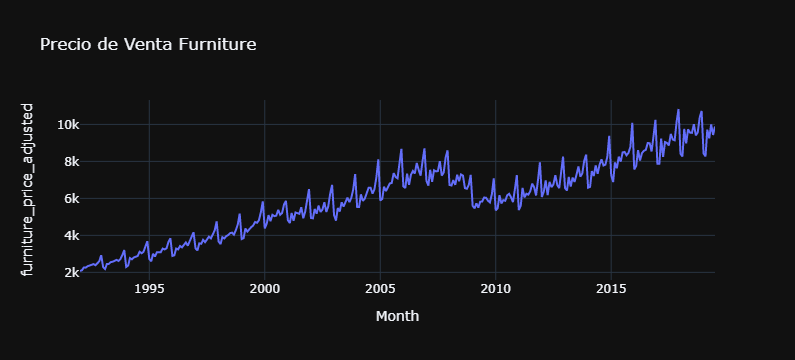

In [ ]:
fig = px.line(df, x=df.index, y="furniture_price_adjusted",template = "plotly_dark",
              title="Precio de Venta Furniture")
fig.show()

Cuando miramos el gráfico, podemos ver que hay una estacionalidad en los datos. Es por eso que usaremos SARIMA (Seasonal ARIMA) en lugar de ARIMA.


## 3.4 La prueba de Dickey-Fuller aumentada
Una prueba de Dickey-Fuller aumentada (ADF) es un tipo de prueba estadística que determina si una raíz unitaria está presente en los datos de series de tiempo. Las raíces unitarias pueden causar resultados impredecibles en el análisis de series de tiempo. Se forma una hipótesis nula en la prueba de raíz unitaria para determinar qué tan fuertemente los datos de series temporales se ven afectados por una tendencia. Al aceptar la hipótesis nula, aceptamos la evidencia de que los datos de la serie temporal no son estacionarios. Al rechazar la hipótesis nula o aceptar la hipótesis alternativa, aceptamos la evidencia de que los datos de la serie de tiempo son generados por un proceso estacionario. Este proceso también se conoce como tendencia estacionaria. Los valores de la estadística de prueba ADF son negativos. Los valores más bajos de ADF indican un rechazo más fuerte de la hipótesis nula.


In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Resultados de la prueba de Dickey-Fuller para columna: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Número de observaciones utilizadas'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Rechazar la hipótesis nula")
        print("Los datos son estacionarios")
    else:
        print("Conclusion:====>")
        print("No se puede rechazar la hipótesis nula")
        print("Los datos no son estacionarios")

In [ ]:
Augmented_Dickey_Fuller_Test_func(df["furniture_price_adjusted"],"furniture_price_adjusted")

Resultados de la prueba de Dickey-Fuller para columna: furniture_price_adjusted
Test Statistic                         -1.128551
p-value                                 0.703553
No Lags Used                           14.000000
Número de observaciones utilizadas    316.000000
Critical Value (1%)                    -3.451215
Critical Value (5%)                    -2.870730
Critical Value (10%)                   -2.571666
dtype: float64
Conclusion:====>
No se puede rechazar la hipótesis nula
Los datos no son estacionarios


Podemos observar en el resultado que obtuvismo que la serie no estacionaria, debido a que el p-value es mayor que 5%.

Uno de los objetivo de aplicar la prueba ADF es conocer si nuestra series es estacionaria, al conocer el resultado de la prueba ADF, entonces podemos determinar el siguiente paso. Para nuestro caso, se puede ver en el resultado anterior que la serie no es estacionar, por lo que procederemos al siguiente paso, que es diferenciar nuestra serie.

In [ ]:
df1=df.copy()
# Take first difference
df1['furniture_diff'] = df['furniture_price_adjusted'].diff()

# Remove the first data point
df1.dropna(inplace=True)

# Take a look at the head of the dataset
df1.head()

furniture_price_adjusted  furniture_diff
Month                                               
1992-02-01               2114.485812       41.053088
1992-03-01               2260.570891      146.085079
1992-04-01               2255.103236       -5.467655
1992-05-01               2331.414618       76.311382
1992-06-01               2384.638567       53.223949

In [ ]:
Augmented_Dickey_Fuller_Test_func(df1["furniture_diff"],"furniture_diff")

Resultados de la prueba de Dickey-Fuller para columna: furniture_diff
Test Statistic                         -3.117451
p-value                                 0.025288
No Lags Used                           17.000000
Número de observaciones utilizadas    312.000000
Critical Value (1%)                    -3.451484
Critical Value (5%)                    -2.870849
Critical Value (10%)                   -2.571730
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios



> Seasonal ARIMA, es una extensión de ARIMA que admite explícitamente datos de series temporales univariadas con un componente estacional.
> Agrega tres nuevos hiperparámetros para especificar la autorregresión (AR), diferenciación (I) y media móvil (MA) para el componente estacional de la serie, así como un parámetro adicional para el período de la estacionalidad.

> Hay cuatro elementos estacionales que no forman parte de ARIMA que deben configurarse; ellos son:<br>
**P:** orden autorregresivo estacional.<br>
**D:** Orden de diferencia estacional.<br>
**P:** Orden promedio móvil estacional.<br>
**m:** El número de pasos de tiempo para un solo período estacional.<br>

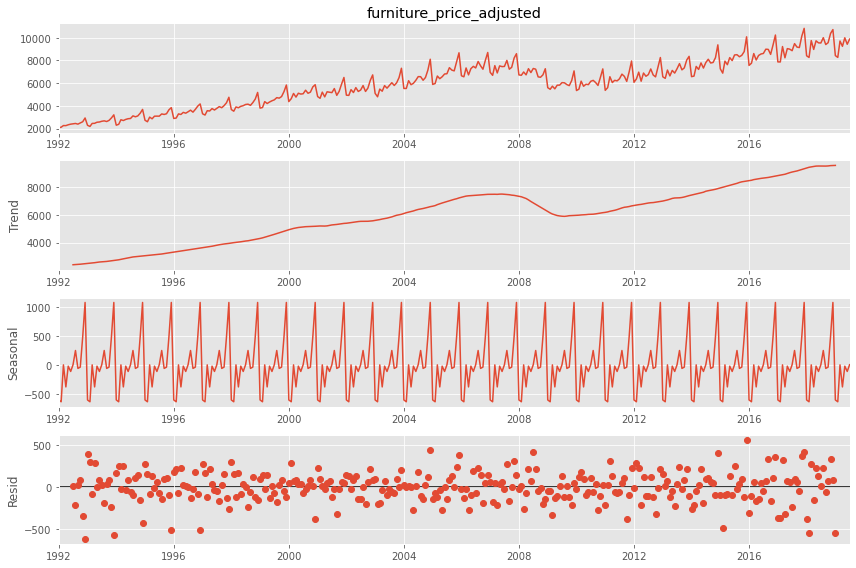

In [ ]:
plt.rcParams["figure.figsize"] = (12, 8)
a = seasonal_decompose(df["furniture_price_adjusted"], model = "add")
a.plot();

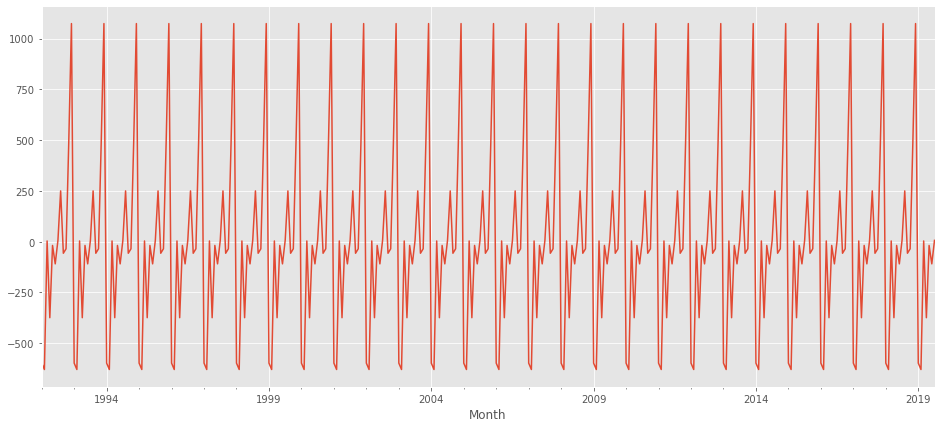

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot();

## 3.5 División de para entrenamiento y prueba

In [ ]:
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]
test=test_data.copy()

In [ ]:
train_data 

furniture_price_adjusted
Month                               
1992-01-01               2073.432724
1992-02-01               2114.485812
1992-03-01               2260.570891
1992-04-01               2255.103236
1992-05-01               2331.414618
...                              ...
2018-03-01               9754.740971
2018-04-01               8973.885759
2018-05-01               9733.086145
2018-06-01               9554.807941
2018-07-01               9542.663403

[319 rows x 1 columns]

In [ ]:
test_data

furniture_price_adjusted
Month                               
2018-08-01              10010.598100
2018-09-01               9407.297340
2018-10-01               9569.037851
2018-11-01              10380.194097
2018-12-01              10726.595075
2019-01-01               8431.965334
2019-02-01               8271.237355
2019-03-01               9718.107698
2019-04-01               9248.814254
2019-05-01              10001.305304
2019-06-01               9431.337229
2019-07-01               9887.800688

## 3.6 Modelo Auto-Arima

Ejecutemos la función `auto_arima()` para obtener los mejores parametros de p,d,q,P,D,Q

**Nota:** El parámetro $m$ se refiere al número de periodo para cada estacionalidad
* 7 para los días
* 12 para los meses
* 52 para las semanas
* 4 Trimestral
* 1 Anual

In [ ]:
modelo_auto=auto_arima(train_data,start_p=0,d=1,start_q=0,
          max_p=4,max_d=2,max_q=4, start_P=0,
          D=1, start_Q=0, max_P=2,max_D=1,
          max_Q=2, m=12, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True,
          random_state=20,n_fits=50)
print(modelo_auto)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4169.959, Time=2.90 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4106.391, Time=1.95 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4076.493, Time=2.43 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=4095.669, Time=0.65 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=4061.495, Time=5.13 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=4087.151, Time=0.84 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=4057.488, Time=5.18 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=4075.752, Time=1.89 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=4045.407, Time=8.54 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=4059.986, Time=8.41 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=10.54 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=4047.345, Time=17.56 sec
 ARIMA(0,1,2)(2,1,2)[12]             : AIC=4047.314, Time=14.03 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=inf, Time=9.67 sec
 ARIMA(1,1,2)(2,1,2)[12]  

Como podemos ver, el mejor modelo de arima elegido por auto_arima() es SARIMAX(1, 1, 3)x(2, 1, 1, 12)

In [ ]:
print(modelo_auto.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  319
Model:             SARIMAX(0, 1, 1)x(2, 1, [1, 2], 12)   Log Likelihood               -2016.704
Date:                                 Wed, 29 Jun 2022   AIC                           4045.407
Time:                                         18:44:52   BIC                           4067.749
Sample:                                              0   HQIC                          4054.342
                                                 - 319                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4014      0.043     -9.353      0.000      -0.485      -0

## **3.7 Implementación del Modelo**

In [ ]:
arima_model = SARIMAX(train_data["furniture_price_adjusted"], order = (0,1,1), seasonal_order = (2,1,2,12))
arima_result = arima_model.fit() 
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                furniture_price_adjusted   No. Observations:                  319
Model:             SARIMAX(0, 1, 1)x(2, 1, [1, 2], 12)   Log Likelihood               -2016.704
Date:                                 Wed, 29 Jun 2022   AIC                           4045.407
Time:                                         12:43:22   BIC                           4067.749
Sample:                                     01-01-1992   HQIC                          4054.342
                                          - 07-01-2018                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4014      0.043     -9.353      0.000      -0.485      -0.317
ar.S.L12       0.8930      0.090      9.974      0.000       0.717       1.068
ar.S.L24      -0.7698      0.081     -9.449      0.000      -0.929      -0.610
ma.S.L12      -1.1505      0.106    -10.884      0.000      -1.358      -0.943
ma.S.L24       0.7396      0.099      7.449      0.000       0.545       0.934
sigma2      2.997e+04   2096.304     14.295      0.000    2.59e+04    3.41e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                21.70
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               3.95   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

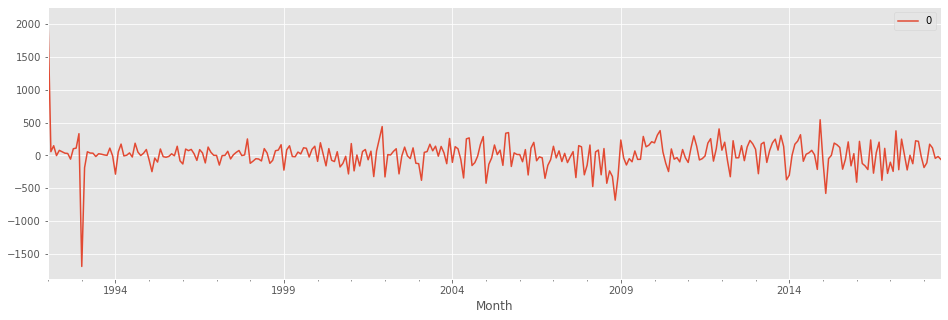

In [ ]:
# line plot of residual errors
residuals = pd.DataFrame(arima_result.resid)
residuals.plot(figsize = (16,5));
plt.show();

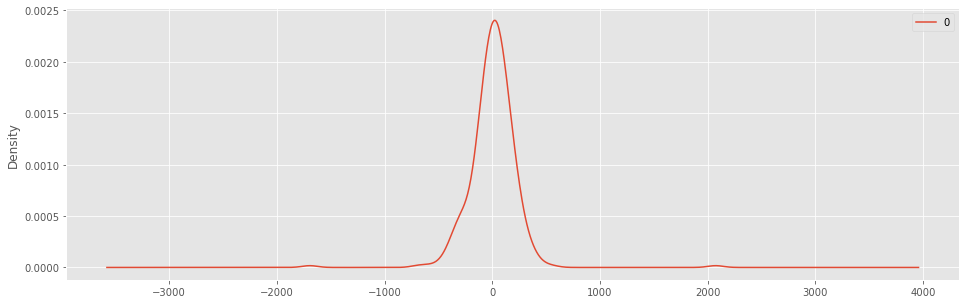

                 0
count   319.000000
mean      4.998665
std     228.694109
min   -1693.465820
25%     -89.380640
50%      11.833287
75%     110.342022
max    2073.432724


In [ ]:
# kernel density plot of residual errors
residuals.plot(kind='kde', figsize = (16,5))
plt.show()
print(residuals.describe())

### **Cómo interpretar las gráficas de residuos en el modelo ARIMA**
Repasemos las gráficas de residuos usando stepwise_fit.

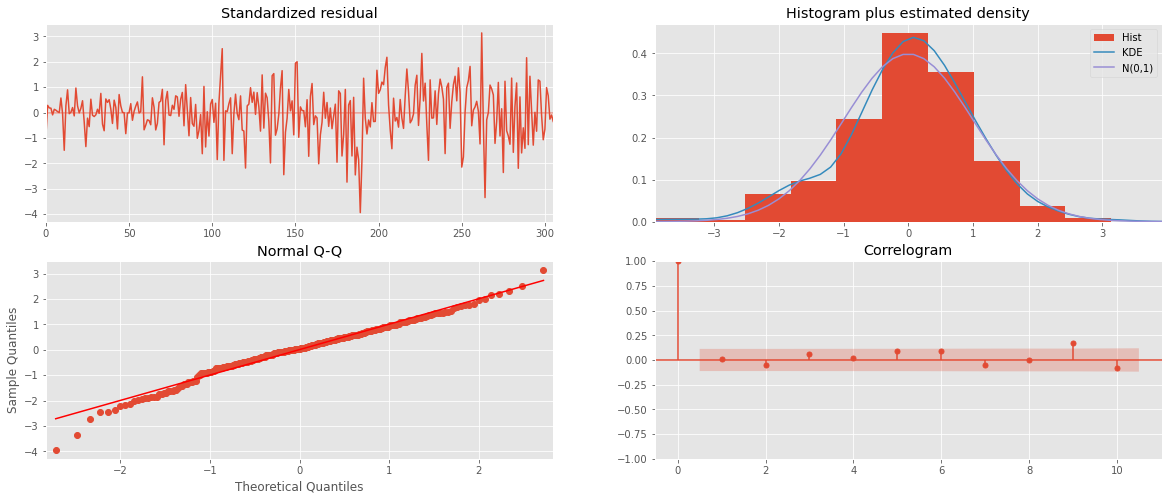

In [ ]:
modelo_auto.plot_diagnostics(figsize=(20,8))
plt.show()

Entonces, ¿cómo interpretar los diagnósticos de la trama?

Arriba a la izquierda: los errores residuales parecen fluctuar alrededor de una media de cero y tienen una varianza uniforme.

Arriba a la derecha: la gráfica de densidad sugiere una distribución normal con media cero.

Abajo a la izquierda: todos los puntos deben estar perfectamente alineados con la línea roja. Cualquier desviación significativa implicaría que la distribución está sesgada.

Abajo a la derecha: el correlograma, también conocido como gráfico ACF, muestra que los errores residuales no están autocorrelacionados. Cualquier autocorrelación implicaría que existe algún patrón en los errores residuales que no se explican en el modelo. Por lo tanto, deberá buscar más X (predictores) en el modelo.

En general, parece encajar bien. Pronostiquemos.

**Forma 1**

In [ ]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

2018-08-01    10146.951764
2018-09-01     9740.513259
2018-10-01     9842.238679
2018-11-01    10656.847777
2018-12-01    11394.208658
2019-01-01     9030.427710
2019-02-01     8797.014474
2019-03-01    10110.145632
2019-04-01     9516.779676
2019-05-01    10268.653771
2019-06-01    10048.200368
2019-07-01    10179.644001
Freq: MS, Name: ARIMA Predictions, dtype: float64

Si queremos estimar o predecir otros periodos diferente de los datos de entrenamiento lo podemos hacer de la siguiente manera, escribiendo las fechas de inicio y la fecha final donde queremos hacer la predicción.

**Forma 2**

In [ ]:
arima_pred2 = arima_result.predict(start='2015-01-01',end='2025-01-01', typ="levels").rename("ARIMA Predictions")
arima_pred2

2015-01-01     7346.789715
2015-02-01     7465.068309
2015-03-01     7991.354825
2015-04-01     7629.713410
2015-05-01     8068.349670
                  ...     
2024-09-01    11952.544302
2024-10-01    11995.576890
2024-11-01    12779.269730
2024-12-01    13557.642364
2025-01-01    11137.707737
Freq: MS, Name: ARIMA Predictions, Length: 121, dtype: float64

Grafiquemos ambos casos:

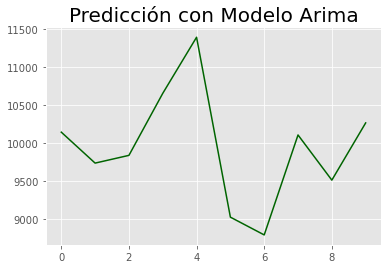

In [ ]:
test_data["furniture_price_adjusted"].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);
plt.title("Predicción con Modelo Arima", fontsize=20);

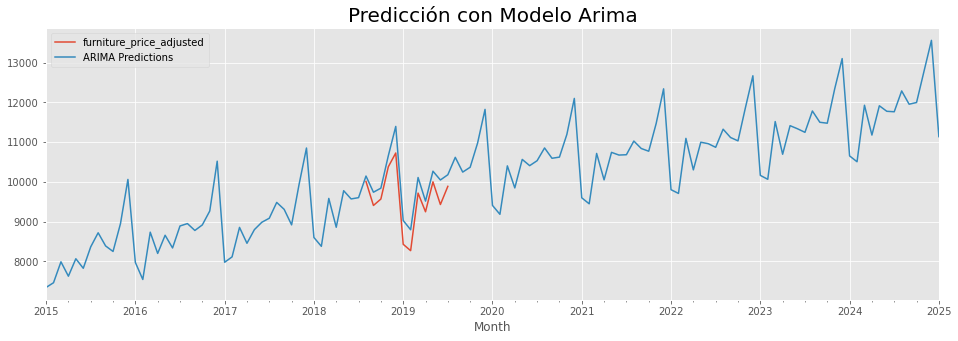

In [ ]:
test_data["furniture_price_adjusted"].plot(figsize = (16,5), legend=True)
arima_pred2.plot(legend = True);
plt.title("Predicción con Modelo Arima", fontsize=20);

Podemos ver que la predicciones tiene un comportamiento parecido a los datos originales.

In [ ]:
evaluacion_metrica(test_data,arima_pred)

Evaluation metric results:-
MSE is : 176981.23965897466
MAE is : 387.277953718274
RMSE is : 420.691382915047
MAPE is : 8.73207146444392
R2 is : 0.6223061103969458



Guardemos los datos, para luego hacer unas comparaciones con los demás modelos.

In [ ]:
test_data['ARIMA_Predictions'] = arima_pred

In [ ]:
test_data

furniture_price_adjusted  ARIMA_Predictions
Month                                                  
2018-08-01              10010.598100       10146.951764
2018-09-01               9407.297340        9740.513259
2018-10-01               9569.037851        9842.238679
2018-11-01              10380.194097       10656.847777
2018-12-01              10726.595075       11394.208658
2019-01-01               8431.965334        9030.427710
2019-02-01               8271.237355        8797.014474
2019-03-01               9718.107698       10110.145632
2019-04-01               9248.814254        9516.779676
2019-05-01              10001.305304       10268.653771
2019-06-01               9431.337229       10048.200368
2019-07-01               9887.800688       10179.644001

# 4. LSTM Forecast

> LSTM significa memoria a corto plazo. Es un modelo o arquitectura que amplía la memoria de las redes neuronales recurrentes. Por lo general, las redes neuronales recurrentes tienen "memoria a corto plazo" en el sentido de que utilizan información anterior persistente para ser utilizada en la red neuronal actual. Esencialmente, la información anterior se utiliza en la presente tarea. Eso significa que no tenemos una lista de toda la información anterior disponible para el nodo neuronal.
> LSTM introduce la memoria a largo plazo en las redes neuronales recurrentes. Mitiga el problema del gradiente de fuga, que es donde la red neuronal deja de aprender porque las actualizaciones de los diversos pesos dentro de una red neuronal dada se vuelven cada vez más pequeñas. Lo hace mediante el uso de una serie de "puertas". Estos están contenidos en bloques de memoria que están conectados a través de capas, así:

![](https://hub.packtpub.com/wp-content/uploads/2018/04/LSTM-696x494.png)

> trabajo LSTM
Hay tres tipos de puertas dentro de una unidad:
Puerta de entrada: escala la entrada a la celda (escritura)
Puerta de salida: escala la salida a la celda (lectura)
Forget Gate: escala el valor de la celda anterior (restablecer)
Cada puerta es como un interruptor que controla la lectura/escritura, incorporando así la función de memoria a largo plazo en el modelo.



## 4.1 Estandarización 
Primero escalaremos nuestro datos de entrenamiento y probaremos los datos con MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)

scaled_test_data = scaler.transform(test)

Antes de crear el modelo LSTM, debemos crear un objeto Generador de series temporales.

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

## 4.2 Modelación

## 4.2.1 Parámetros clave para LSTM con Keras
Veamos los parámetros clave para ajustar el modelo LSTM.

* **hidden_layer_sizes:** Debe proporcionar una cantidad de capas ocultas y neuronas para cada capa oculta. Por ejemplo, hidden_layer_sizes – (5,3,3) significa que hay tres capas ocultas y el número de neuronas para la capa uno es 5, para la capa dos es 3 y para la capa tres es 3, respectivamente. El valor predeterminado es (100), es decir, una capa oculta con 100 neuronas.
* **activation:** Esta es la función de activación de una capa oculta; hay cuatro funciones de activación disponibles para su uso; el valor predeterminado es "relu".
     * relu: La función de unidad lineal rectificada, devuelve $f(x) = max(0, x)$
     * logística: La función sigmoidea logística, devuelve f(x) = 1 / (1 + exp(-x)).
     * identidad: activación sin operación, útil para implementar un cuello de botella lineal, devuelve f(x) = x
     * tanh: La función tan hiperbólica, devuelve $f(x) = tanh(x)$.
* **solver:** Esto es para optimizar el peso. Hay tres opciones disponibles, la predeterminada es "adam".
     * adam: Optimizador basado en gradiente estocástico propuesto por Diederik Kingma y Jimmy Ba, que funciona bien para un gran conjunto de datos
     * lbfgs: Pertenece a la familia de métodos cuasi-Newton, funciona bien para conjuntos de datos pequeños
     * sgd: Descenso de gradiente estocástico
* **max_iter:** Este es el número máximo de iteraciones para que el solucionador converja, el valor predeterminado es 200.
* **learning_rate_init:** Esta es la tasa de aprendizaje inicial para controlar el tamaño de paso para actualizar los pesos (solo se aplica a los solucionadores sgd/ adam), el valor predeterminado es 0,001.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200)               161600    
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstm_model.fit_generator(generator,epochs=30)

Epoch 1/30
307/307 [==============================] - 41s 45ms/step - loss: 0.0118
Epoch 2/30
307/307 [==============================] - 12s 39ms/step - loss: 0.0053
Epoch 3/30
307/307 [==============================] - 12s 38ms/step - loss: 0.0044
Epoch 4/30
307/307 [==============================] - 13s 42ms/step - loss: 0.0053
Epoch 5/30
307/307 [==============================] - 11s 35ms/step - loss: 0.0048
Epoch 6/30
307/307 [==============================] - 12s 40ms/step - loss: 0.0046
Epoch 7/30
307/307 [==============================] - 11s 36ms/step - loss: 0.0036
Epoch 8/30
307/307 [==============================] - 12s 39ms/step - loss: 0.0038
Epoch 9/30
307/307 [==============================] - 12s 40ms/step - loss: 0.0033
Epoch 10/30
307/307 [==============================] - 11s 35ms/step - loss: 0.0031
Epoch 11/30
307/307 [==============================] - 10s 34ms/step - loss: 0.0027
Epoch 12/30
307/307 [==============================] - 10s 34ms/step - loss: 0.0028
E

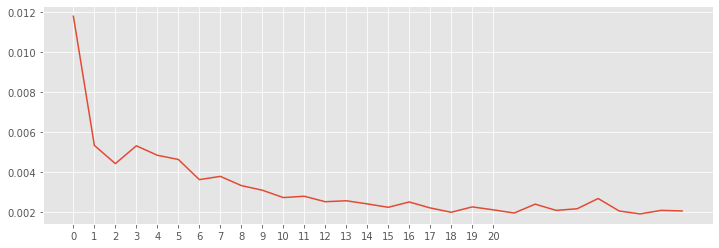

In [ ]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [ ]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

Como saben, escalamos nuestros datos, por eso tenemos que invertirlos para ver predicciones verdaderas.

In [ ]:
lstm_predictions_scaled

[array([0.9170424], dtype=float32),
 array([0.89497054], dtype=float32),
 array([0.88952434], dtype=float32),
 array([1.0020432], dtype=float32),
 array([1.1029956], dtype=float32),
 array([0.8495643], dtype=float32),
 array([0.8079389], dtype=float32),
 array([0.94800377], dtype=float32),
 array([0.88321835], dtype=float32),
 array([0.95664513], dtype=float32),
 array([0.9521888], dtype=float32),
 array([0.9515759], dtype=float32)]

In [ ]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

In [ ]:
lstm_predictions

array([[10106.78731921],
       [ 9913.43648922],
       [ 9865.72743926],
       [10851.40083927],
       [11735.75072681],
       [ 9515.67484264],
       [ 9151.03310968],
       [10378.01127368],
       [ 9810.48650813],
       [10453.71020383],
       [10414.67234628],
       [10409.30317234]])

Guardamos las predicciones para compararla con las verdaderas y el modelo Arima

In [ ]:
test_data['LSTM_Predictions'] = lstm_predictions

In [ ]:
test_data

furniture_price_adjusted  ARIMA_Predictions  LSTM_Predictions
Month                                                                    
2018-08-01              10010.598100       10146.951764      10106.787319
2018-09-01               9407.297340        9740.513259       9913.436489
2018-10-01               9569.037851        9842.238679       9865.727439
2018-11-01              10380.194097       10656.847777      10851.400839
2018-12-01              10726.595075       11394.208658      11735.750727
2019-01-01               8431.965334        9030.427710       9515.674843
2019-02-01               8271.237355        8797.014474       9151.033110
2019-03-01               9718.107698       10110.145632      10378.011274
2019-04-01               9248.814254        9516.779676       9810.486508
2019-05-01              10001.305304       10268.653771      10453.710204
2019-06-01               9431.337229       10048.200368      10414.672346
2019-07-01               9887.800688       10179.644001      10409.303172

Graficamos las predicciones con los datos originales

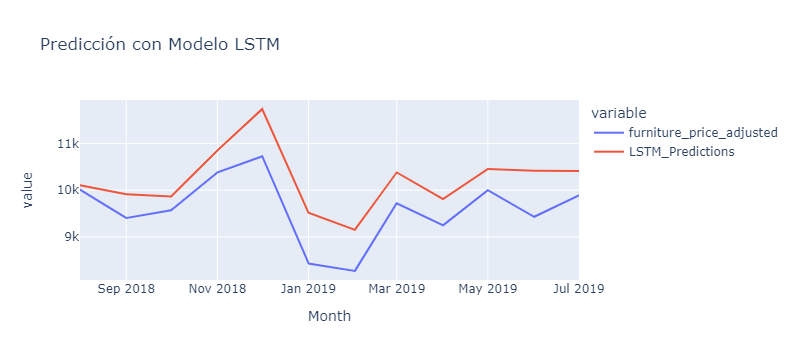

In [ ]:
ai=test_data[["furniture_price_adjusted","LSTM_Predictions"]]
fig = px.line(ai, x=test_data.index, y=ai.columns,title="Predicción con Modelo LSTM")
fig.show()

## 4.3 Evaluación

In [ ]:
evaluacion_metrica(test_data["furniture_price_adjusted"],test_data["LSTM_Predictions"])

Evaluation metric results:-
MSE is : 478073.5955211823
MAE is : 626.8086620938867
RMSE is : 691.4286626407545
MAPE is : 6.6638009225531025
R2 is : -0.020252068280482316



# 5. Random Forest
Vamos a descubrirá el modelo Random Forest. Es un modelo fácil de usar y se sabe que tiene un gran rendimiento. Random Forest y el modelo XGBoost, son dos de los algoritmos de aprendizaje automático más utilizados en las aplicaciones modernas.

Existe una gran cantidad de variantes en Random Forests y XGBoost en el mercado, pero si comprende los dos conceptos básicos, será relativamente fácil adaptarse a cualquier variante.

## 5.1 Idea intuitiva detrás de los bosques aleatorios
Random Forest se basa fuertemente en el modelo Decision Tree pero le agrega más complejidad. Como sugiere el nombre, un bosque aleatorio consta de una gran cantidad de árboles de decisión, cada uno de ellos con una ligera variación.

Un bosque aleatorio tiene mucho más rendimiento que un árbol de decisión. Generalmente, un bosque aleatorio puede combinar cientos o incluso miles de modelos de árboles de decisión. Se ajustarán a datos ligeramente diferentes, para que no sean totalmente iguales. Entonces, en resumen, es una gran cantidad de árboles de decisión que hacen predicciones que deberían ser cercanas entre sí, pero no exactamente iguales.

Donde un modelo de aprendizaje automático a veces puede ser incorrecto, es menos probable que la predicción promedio de una gran cantidad de modelos de aprendizaje automático sea incorrecta. Esta idea es la base del aprendizaje conjunto.

En Random Forest, el aprendizaje conjunto se aplica a una repetición de muchos árboles de decisión. El aprendizaje de conjunto se puede aplicar a cualquier combinación de una gran cantidad de modelos de aprendizaje automático. La razón para usar Decision Trees es que se ha demostrado que es un modelo eficaz y fácil de configurar.

In [ ]:
df5 = pd.read_csv('data/df_furniture.csv')
df5.head()

Month  furniture_price_adjusted
0  1992-01-01               2073.432724
1  1992-02-01               2114.485812
2  1992-03-01               2260.570891
3  1992-04-01               2255.103236
4  1992-05-01               2331.414618

### Percentage Change
Recall that the original unit was in millions of dollars, which is sales of furniture and home furnishings. 
One type of differencing is percentage change, which is typically applied to money units in price amounts or sales in dollars.

Between each data point, we can calculate the percentage change.  We will need to drop the first data point since it will become a Nan.

In [ ]:
df5['furniture_pct_change']= df5['furniture_price_adjusted'].pct_change()
df5.dropna(inplace=True)
df5.head()

Month  furniture_price_adjusted  furniture_pct_change
1  1992-02-01               2114.485812              0.019800
2  1992-03-01               2260.570891              0.069088
3  1992-04-01               2255.103236             -0.002419
4  1992-05-01               2331.414618              0.033839
5  1992-06-01               2384.638567              0.022829

In [ ]:
df5['furniture_pct_change'].describe()

count    330.000000
mean       0.009588
std        0.094790
min       -0.284492
25%       -0.032020
50%        0.022959
75%        0.073826
max        0.179970
Name: furniture_pct_change, dtype: float64

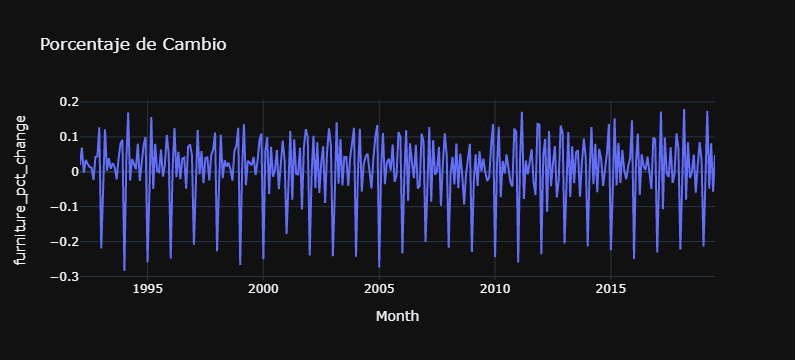

In [ ]:
fig = px.line(df5, x="Month", y="furniture_pct_change",template = "plotly_dark",
              title="Porcentaje de Cambio")
fig.show()

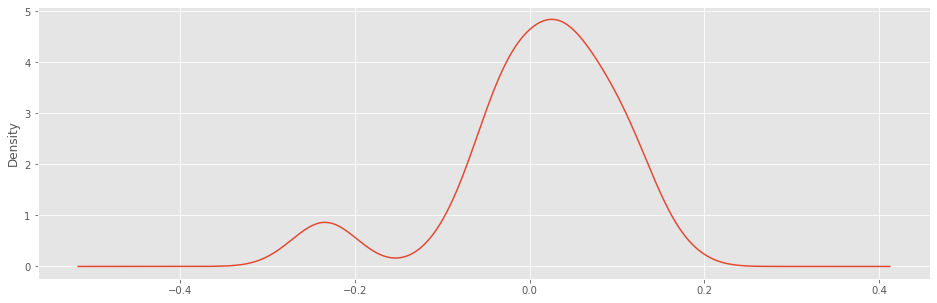

In [ ]:
df5['furniture_pct_change'].plot(kind='kde',figsize = (16,5));

Ahora es necesario agregar algo de ingeniería de funciones. Agreguemos las variables Año y Mes para tener en cuenta la estacionalidad y las versiones rezagadas de la variable objetivo durante los últimos 12 meses. Se puede esperar que esta tarea sea un poco más difícil, ya que hay una variación más detallada que el modelo necesita aprender. 

## 5.2 Feature engineering

In [ ]:
# Seasonality variables
df5['Month'] = pd.to_datetime(df5['Month'])
df5['Year'] = df5['Month'].apply(lambda x: x.year)
df5['Mes'] = df5['Month'].apply(lambda x: x.month)
df5.head()

Month  furniture_price_adjusted  furniture_pct_change  Year  Mes
1 1992-02-01               2114.485812              0.019800  1992    2
2 1992-03-01               2260.570891              0.069088  1992    3
3 1992-04-01               2255.103236             -0.002419  1992    4
4 1992-05-01               2331.414618              0.033839  1992    5
5 1992-06-01               2384.638567              0.022829  1992    6

In [ ]:

# Adding a year of lagged data
df5['L1'] = df5["furniture_pct_change"].shift(1)
df5['L2'] = df5["furniture_pct_change"].shift(2)
df5['L3'] = df5["furniture_pct_change"].shift(3)
df5['L4'] = df5["furniture_pct_change"].shift(4)
df5['L5'] = df5["furniture_pct_change"].shift(5)
df5['L6'] = df5["furniture_pct_change"].shift(6)
df5['L7'] = df5["furniture_pct_change"].shift(7)
df5['L8'] = df5["furniture_pct_change"].shift(8)
df5['L9'] = df5["furniture_pct_change"].shift(9)
df5['L10'] = df5["furniture_pct_change"].shift(10)
df5['L11'] = df5["furniture_pct_change"].shift(11)
df5['L12'] = df5["furniture_pct_change"].shift(12)

In [ ]:
df5.head(13)

Month  furniture_price_adjusted  furniture_pct_change  Year  Mes  \
1  1992-02-01               2114.485812              0.019800  1992    2   
2  1992-03-01               2260.570891              0.069088  1992    3   
3  1992-04-01               2255.103236             -0.002419  1992    4   
4  1992-05-01               2331.414618              0.033839  1992    5   
5  1992-06-01               2384.638567              0.022829  1992    6   
6  1992-07-01               2417.165376              0.013640  1992    7   
7  1992-08-01               2445.498729              0.011722  1992    8   
8  1992-09-01               2387.351705             -0.023777  1992    9   
9  1992-10-01               2489.350838              0.042725  1992   10   
10 1992-11-01               2598.186297              0.043720  1992   11   
11 1992-12-01               2928.725684              0.127219  1992   12   
12 1993-01-01               2284.619439             -0.219927  1993    1   
13 1993-02-01               2183.137948             -0.044419  1993    2   

          L1        L2        L3        L4        L5        L6        L7  \
1        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2   0.019800       NaN       NaN       NaN       NaN       NaN       NaN   
3   0.069088  0.019800       NaN       NaN       NaN       NaN       NaN   
4  -0.002419  0.069088  0.019800       NaN       NaN       NaN       NaN   
5   0.033839 -0.002419  0.069088  0.019800       NaN       NaN       NaN   
6   0.022829  0.033839 -0.002419  0.069088  0.019800       NaN       NaN   
7   0.013640  0.022829  0.033839 -0.002419  0.069088  0.019800       NaN   
8   0.011722  0.013640  0.022829  0.033839 -0.002419  0.069088  0.019800   
9  -0.023777  0.011722  0.013640  0.022829  0.033839 -0.002419  0.069088   
10  0.042725 -0.023777  0.011722  0.013640  0.022829  0.033839 -0.002419   
11  0.043720  0.042725 -0.023777  0.011722  0.013640  0.022829  0.033839   
12  0.127219  0.043720  0.042725 -0.023777  0.011722  0.013640  0.022829   
13 -0.219927  0.127219  0.043720  0.042725 -0.023777  0.011722  0.013640   

          L8        L9       L10       L11     L12  
1        NaN       NaN       NaN       NaN     NaN  
2        NaN       NaN       NaN       NaN     NaN  
3        NaN       NaN       NaN       NaN     NaN  
4        NaN       NaN       NaN       NaN     NaN  
5        NaN       NaN       NaN       NaN     NaN  
6        NaN       NaN       NaN       NaN     NaN  
7        NaN       NaN       NaN       NaN     NaN  
8        NaN       NaN       NaN       NaN     NaN  
9   0.019800       NaN       NaN       NaN     NaN  
10  0.069088  0.019800       NaN       NaN     NaN  
11 -0.002419  0.069088  0.019800       NaN     NaN  
12  0.033839 -0.002419  0.069088  0.019800     NaN  
13  0.022829  0.033839 -0.002419  0.069088  0.0198

Ahora que tiene un conjunto de datos, hagamos una división de prueba de entrenamiento y ajustemos el Random Forest con los hiperparámetros predeterminados. 

In [ ]:
df5 = df5.dropna()
df5.head()

Month  furniture_price_adjusted  furniture_pct_change  Year  Mes  \
13 1993-02-01               2183.137948             -0.044419  1993    2   
14 1993-03-01               2449.195623              0.121869  1993    3   
15 1993-04-01               2457.704334              0.003474  1993    4   
16 1993-05-01               2552.874950              0.038723  1993    5   
17 1993-06-01               2575.018055              0.008674  1993    6   

          L1        L2        L3        L4        L5        L6        L7  \
13 -0.219927  0.127219  0.043720  0.042725 -0.023777  0.011722  0.013640   
14 -0.044419 -0.219927  0.127219  0.043720  0.042725 -0.023777  0.011722   
15  0.121869 -0.044419 -0.219927  0.127219  0.043720  0.042725 -0.023777   
16  0.003474  0.121869 -0.044419 -0.219927  0.127219  0.043720  0.042725   
17  0.038723  0.003474  0.121869 -0.044419 -0.219927  0.127219  0.043720   

          L8        L9       L10       L11       L12  
13  0.022829  0.033839 -0.002419  0.069088  0.019800  
14  0.013640  0.022829  0.033839 -0.002419  0.069088  
15  0.011722  0.013640  0.022829  0.033839 -0.002419  
16 -0.023777  0.011722  0.013640  0.022829  0.033839  
17  0.042725 -0.023777  0.011722  0.013640  0.022829

In [ ]:
df5= df5.set_index("Month")
df5.head()

furniture_price_adjusted  furniture_pct_change  Year  Mes  \
Month                                                                   
1993-02-01               2183.137948             -0.044419  1993    2   
1993-03-01               2449.195623              0.121869  1993    3   
1993-04-01               2457.704334              0.003474  1993    4   
1993-05-01               2552.874950              0.038723  1993    5   
1993-06-01               2575.018055              0.008674  1993    6   

                  L1        L2        L3        L4        L5        L6  \
Month                                                                    
1993-02-01 -0.219927  0.127219  0.043720  0.042725 -0.023777  0.011722   
1993-03-01 -0.044419 -0.219927  0.127219  0.043720  0.042725 -0.023777   
1993-04-01  0.121869 -0.044419 -0.219927  0.127219  0.043720  0.042725   
1993-05-01  0.003474  0.121869 -0.044419 -0.219927  0.127219  0.043720   
1993-06-01  0.038723  0.003474  0.121869 -0.044419 -0.219927  0.127219   

                  L7        L8        L9       L10       L11       L12  
Month                                                                   
1993-02-01  0.013640  0.022829  0.033839 -0.002419  0.069088  0.019800  
1993-03-01  0.011722  0.013640  0.022829  0.033839 -0.002419  0.069088  
1993-04-01 -0.023777  0.011722  0.013640  0.022829  0.033839 -0.002419  
1993-05-01  0.042725 -0.023777  0.011722  0.013640  0.022829  0.033839  
1993-06-01  0.043720  0.042725 -0.023777  0.011722  0.013640  0.022829

## 5.3 Modelación

In [ ]:
furn = df5
# split into lagged variables (features) and original time series data (target)
X2= df5.iloc[:,2:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y2 = furn.iloc[:,1]  # slice all rows and last column, essentially separating out 't' column

In [ ]:
X2

NameError: name 'X2' is not defined

In [ ]:
# Target Train-Test split
from pandas import read_csv

Y2 = y2
traintarget_size = int(len(Y2) * 0.80)   # Set split
train_target, test_target = Y2[0:traintarget_size], Y2[traintarget_size:len(Y2)]

print('Observations for Target: %d' % (len(Y2)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

Observations for Target: 318
Training Observations for Target: 254
Testing Observations for Target: 64


In [ ]:
# Features Train-Test split

trainfeature_size = int(len(X2) * 0.80)
train_feature, test_feature = X2[0:trainfeature_size], X2[trainfeature_size:len(X2)]
print('Observations for feature: %d' % (len(X2)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

Observations for feature: 318
Training Observations for feature: 254
Testing Observations for feature: 64


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Creamos el modelo con 500 árboles
rfr = RandomForestRegressor(n_estimators=500)

# Entrenamos el modelo
rfr.fit(train_feature, train_target)

# Hacemos las predicciones 
fcst = rfr.predict(test_feature)

In [ ]:
b=pd.DataFrame({"Actual":test_target, "Random Forest":fcst})
b

Actual  Random Forest
Month                              
2014-04-01 -0.035453      -0.048874
2014-05-01  0.079872       0.069505
2014-06-01 -0.058245      -0.029178
2014-07-01  0.065819       0.031265
2014-08-01  0.037654      -0.006610
...              ...            ...
2019-03-01  0.174928       0.114575
2019-04-01 -0.048291      -0.058570
2019-05-01  0.081361       0.067709
2019-06-01 -0.056989      -0.017906
2019-07-01  0.048399       0.022455

[64 rows x 2 columns]

In [ ]:
#b.set_index("2018-08-01")
#b=b.loc['2018-08-01':"2019-07-01"]

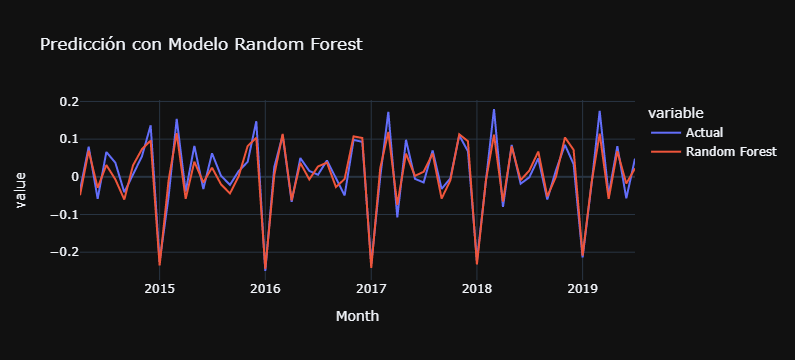

In [ ]:
fig = px.line(b, x=b.index, y=b.columns,template = "plotly_dark",
              title="Predicción con Modelo Random Forest")
fig.show()

Parece que Random Forest se ajusto bien, los valores pronosticados siguen los valores reales.

## 5.4 Evaluamos el modelo

In [ ]:
evaluacion_metrica(test_target,fcst)

Evaluation metric results:-
MSE is : 0.0007222934952541171
MAE is : 0.022265240730620854
RMSE is : 0.02687551851135373
MAPE is : 193.3454765118411
R2 is : 0.9207678109595808



# 6. Prophet Forecast

> Prophet es un procedimiento para pronosticar datos de series temporales basado en un modelo aditivo en el que las tendencias no lineales se ajustan a la estacionalidad anual, semanal y diaria, además de los efectos de las vacaciones. Funciona mejor con series temporales que tienen fuertes efectos estacionales y varias temporadas de datos históricos. Prophet es resistente a los datos faltantes y los cambios en la tendencia, y por lo general maneja bien los valores atípicos.

In [ ]:
import pandas as pd
from prophet import Prophet

In [ ]:
df6 = df.copy()
df6.head()

furniture_price_adjusted
Month                               
1992-01-01               2073.432724
1992-02-01               2114.485812
1992-03-01               2260.570891
1992-04-01               2255.103236
1992-05-01               2331.414618

In [ ]:
df6=df6.reset_index()

In [ ]:
df_fb=df6.rename(columns={"Month":"ds", "furniture_price_adjusted":"y"} )
df_fb.head()

ds            y
0 1992-01-01  2073.432724
1 1992-02-01  2114.485812
2 1992-03-01  2260.570891
3 1992-04-01  2255.103236
4 1992-05-01  2331.414618

In [ ]:
train_data_pr = df_fb.iloc[:len(df6)-12]
test_data_pr = df_fb.iloc[len(df6)-12:]

## 6.1 Modelación

In [ ]:
from prophet import Prophet

In [ ]:
m = Prophet()
m.fit(train_data_pr)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=12,freq='MS')
prophet_pred = m.predict(future)

In [ ]:
prophet_pred.tail()

ds         trend   yhat_lower    yhat_upper  trend_lower  \
326 2019-03-01   9885.509838  9507.970934  10094.991625  9859.044208   
327 2019-04-01   9924.211757  9238.020568   9804.546894  9889.144624   
328 2019-05-01   9961.665228  9632.865087  10234.883051  9916.204784   
329 2019-06-01  10000.367147  9576.692817  10177.566540  9945.764713   
330 2019-07-01  10037.820617  9743.307702  10297.889011  9975.077227   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
326   9907.868435      -85.989059            -85.989059            -85.989059   
327   9954.635658     -415.781153           -415.781153           -415.781153   
328  10001.140105      -22.489231            -22.489231            -22.489231   
329  10047.985895     -129.233507           -129.233507           -129.233507   
330  10094.190686      -15.706425            -15.706425            -15.706425   

         yearly  yearly_lower  yearly_upper  multiplicative_terms  \
326  -85.989059    -85.989059    -85.989059                   0.0   
327 -415.781153   -415.781153   -415.781153                   0.0   
328  -22.489231    -22.489231    -22.489231                   0.0   
329 -129.233507   -129.233507   -129.233507                   0.0   
330  -15.706425    -15.706425    -15.706425                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
326                         0.0                         0.0   9799.520779  
327                         0.0                         0.0   9508.430605  
328                         0.0                         0.0   9939.175997  
329                         0.0                         0.0   9871.133640  
330                         0.0                         0.0  10022.114192

In [ ]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-12:]['ds'], "Pred" : prophet_pred[-12:]["yhat"]})

In [ ]:
prophet_pred = prophet_pred.set_index("Date")

In [ ]:
prophet_pred.index.freq = "MS"

In [ ]:
prophet_pred

Pred
Date                    
2018-08-01   9841.717558
2018-09-01   9581.313898
2018-10-01   9627.603658
2018-11-01  10175.306002
2018-12-01  10832.935730
2019-01-01   9215.678437
2019-02-01   9234.747901
2019-03-01   9799.520779
2019-04-01   9508.430605
2019-05-01   9939.175997
2019-06-01   9871.133640
2019-07-01  10022.114192

In [ ]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values

In [ ]:
test_data.head()

furniture_price_adjusted  ARIMA_Predictions  LSTM_Predictions  \
Month                                                                       
2018-08-01              10010.598100       10146.951764      10106.787319   
2018-09-01               9407.297340        9740.513259       9913.436489   
2018-10-01               9569.037851        9842.238679       9865.727439   
2018-11-01              10380.194097       10656.847777      10851.400839   
2018-12-01              10726.595075       11394.208658      11735.750727   

            Prophet_Predictions  
Month                            
2018-08-01          9841.717558  
2018-09-01          9581.313898  
2018-10-01          9627.603658  
2018-11-01         10175.306002  
2018-12-01         10832.935730

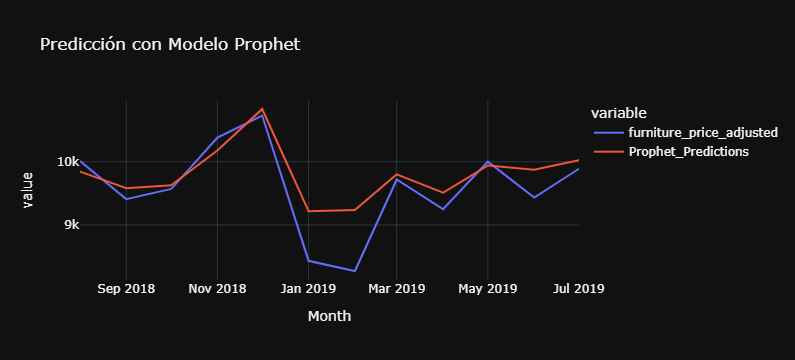

In [ ]:
a=test_data[["furniture_price_adjusted","Prophet_Predictions"]]
fig = px.line(a, x=test_data.index, y=a.columns,template = "plotly_dark",
              title="Predicción con Modelo Prophet")
fig.show()

## 6.2 Evaluación

In [ ]:
evaluacion_metrica(test_data["furniture_price_adjusted"],test_data["Prophet_Predictions"])

Evaluation metric results:-
MSE is : 162285.70089282762
MAE is : 286.4319966654669
RMSE is : 402.84699439468034
MAPE is : 3.19542003794853
R2 is : 0.6536677123785662



## **Resumen**

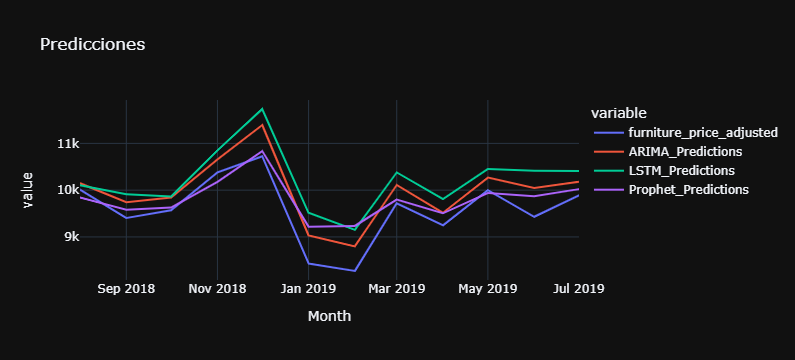

In [ ]:
fig = px.line(test_data, x=test_data.index, y=test_data.columns,template = "plotly_dark",
              title="Predicciones")
fig.show()

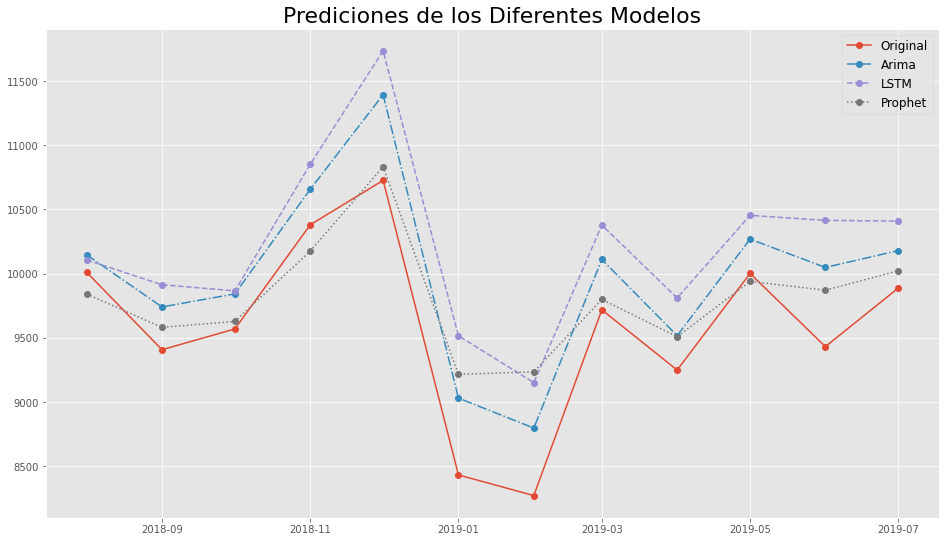

In [ ]:
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data["furniture_price_adjusted"],label="Original", linestyle="-")
plt.plot_date(test_data.index, test_data["ARIMA_Predictions"], label="Arima",linestyle="-.")
plt.plot_date(test_data.index, test_data["LSTM_Predictions"],label="LSTM", linestyle="--")
plt.plot_date(test_data.index, test_data["Prophet_Predictions"], label="Prophet",linestyle=":")
plt.legend(fontsize=12)
plt.title("Prediciones de los Diferentes Modelos", fontsize=22)
plt.show();

In [ ]:
test_data

furniture_price_adjusted  ARIMA_Predictions  LSTM_Predictions  \
Month                                                                       
2018-08-01              10010.598100       10146.951764      10106.787319   
2018-09-01               9407.297340        9740.513259       9913.436489   
2018-10-01               9569.037851        9842.238679       9865.727439   
2018-11-01              10380.194097       10656.847777      10851.400839   
2018-12-01              10726.595075       11394.208658      11735.750727   
2019-01-01               8431.965334        9030.427710       9515.674843   
2019-02-01               8271.237355        8797.014474       9151.033110   
2019-03-01               9718.107698       10110.145632      10378.011274   
2019-04-01               9248.814254        9516.779676       9810.486508   
2019-05-01              10001.305304       10268.653771      10453.710204   
2019-06-01               9431.337229       10048.200368      10414.672346   
2019-07-01               9887.800688       10179.644001      10409.303172   

            Prophet_Predictions  
Month                            
2018-08-01          9841.717558  
2018-09-01          9581.313898  
2018-10-01          9627.603658  
2018-11-01         10175.306002  
2018-12-01         10832.935730  
2019-01-01          9215.678437  
2019-02-01          9234.747901  
2019-03-01          9799.520779  
2019-04-01          9508.430605  
2019-05-01          9939.175997  
2019-06-01          9871.133640  
2019-07-01         10022.114192

No olvides que son solo predicciones rápidas y básicas para que puedas mejorar estos modelos con tuning y de acuerdo a tus datos y conocimiento del negocio.